# Módulo 07 - Tarefa 02

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np

from joblib import load

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
# Importando dados
df = load("df_dumyed")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    16650 non-null  int64  
 1   posse_de_veiculo                        16650 non-null  int64  
 2   posse_de_imovel                         16650 non-null  int64  
 3   qtd_filhos                              16650 non-null  int64  
 4   idade                                   16650 non-null  float64
 5   tempo_emprego                           16650 non-null  float64
 6   possui_fone_comercial                   16650 non-null  int64  
 7   possui_fone                             16650 non-null  int64  
 8   possui_email                            16650 non-null  int64  
 9   qt_pessoas_residencia                   16650 non-null  float64
 10  mau                                     16650 non-null  bo

In [3]:
# Instanciado a variável dependente y e as variáveis independentes x
y = df['mau']
x = df.drop('mau', axis=1)
x.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
       'tempo_emprego', 'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'tipo_renda_Pensioner',
       'tipo_renda_State servant', 'tipo_renda_Student', 'tipo_renda_Working',
       'educacao_Higher education', 'educacao_Incomplete higher',
       'educacao_Lower secondary', 'educacao_Secondary / secondary special',
       'estado_civil_Married', 'estado_civil_Separated',
       'estado_civil_Single / not married', 'estado_civil_Widow',
       'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

In [4]:
# Separando o conjunto de dados em 70%/30%, treino e test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(
    x_train.shape,
    x_test.shape,
    y_train.shape,
    y_test.shape,
)

(11655, 27) (4995, 27) (11655,) (4995,)




---



## 2) Vamos para o modelo:

### 2.1 Defina um objeto com a função da árvore de decisão vista em aula.

In [5]:
# Instanciando objeto classificador
clf = DecisionTreeClassifier(random_state=100)

### 2.2 Treine o modelo com os dados que você separou para treinamento.

In [6]:
# Treinando as árvores
clf = clf.fit(x_train, y_train)

clf

DecisionTreeClassifier(random_state=100)

### 2.3 Visualize a árvore. Talvez você queira aumentar um pouco a figura.

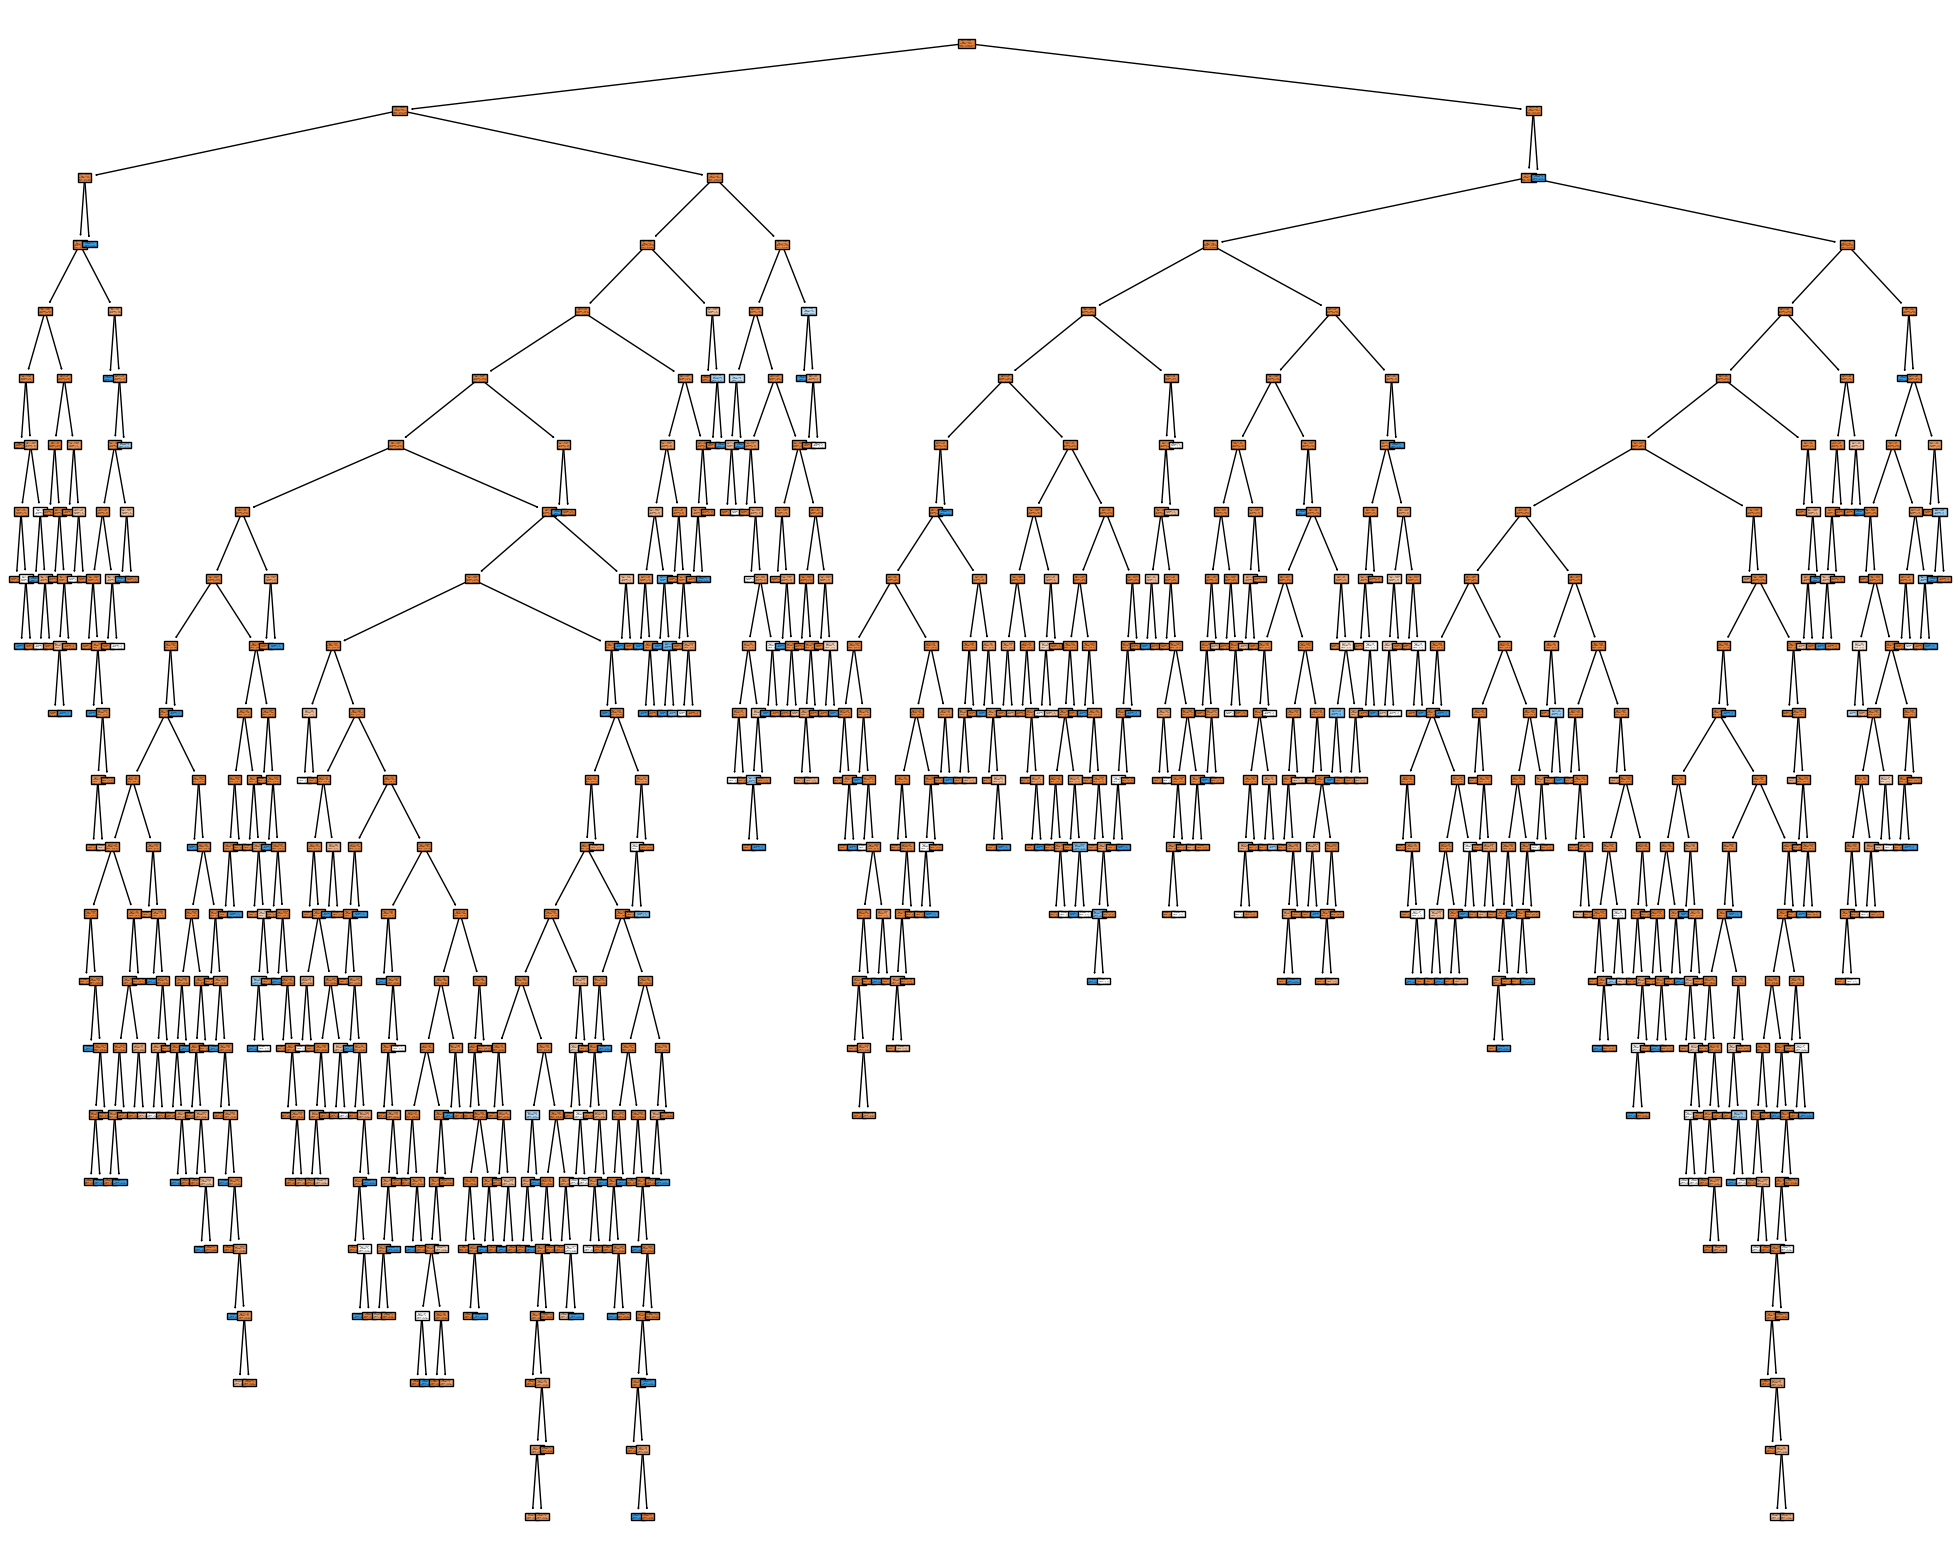

In [7]:
# Visualizando o resultado do treino
plt.figure(figsize=(25, 20))
plot_tree(clf,
          filled=True,
          class_names=['Aprovado', 'Reprovado']
)
plt.show()

### 2.4 Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.

In [8]:
# Verificando quantas classificações de bom e mal pagador existem na base de traino
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 11388]
 [    1   267]]


In [9]:
# Verificando quantas classificações de bom e mal pagador existem na predição
predictions = clf.predict(x_train)
unique, counts = np.unique(predictions, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 11469]
 [    1   186]]


In [10]:
# Observando a matriz de confusão
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)

df_cm = pd.DataFrame(cm, columns=['Pred Aprovado','Pred Reprovado'], index=['Obs Aprovado','Obs Reprovado'])
df_cm

,Pred Aprovado,Pred Reprovado
Obs Aprovado,11381,7
Obs Reprovado,88,179


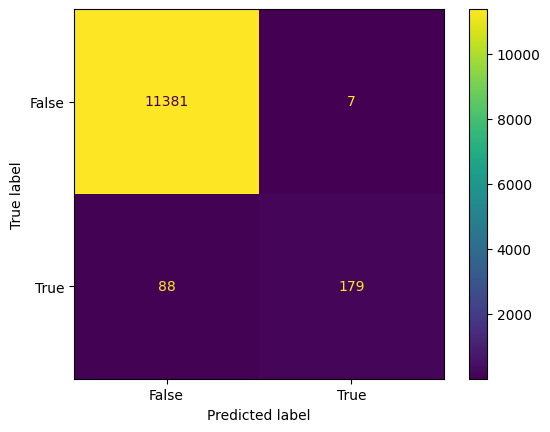

In [11]:
# Observando a matriz de confusão
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=clf.classes_
)
disp.plot()
plt.show()

### 2.5 Calcule a acurácia na base de treinamento

In [12]:
# Calculando a acurácia
print(f"Acurácia: {accuracy_score(predictions, y_train)*100:.2f}%")

Acurácia: 99.18%




---



## 3) Vamos avaliar o modelo na base de testes

### 3.1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.

In [13]:
# Verificando quantas classificações de bom e mal pagador existem na base de teste
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 4872]
 [   1  123]]


In [14]:
# Verificando quantas classificações de bom e mal pagador existem na predição
predictions = clf.predict(x_test)
unique, counts = np.unique(predictions, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 4907]
 [   1   88]]


### 3.2 Produza a visualização da matriz de confusão para a base de teste.

In [15]:
# Observando a matriz de confusão
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

df_cm = pd.DataFrame(cm, columns=['Pred Aprovado','Pred Reprovado'], index=['Obs Aprovado','Obs Reprovado'])
df_cm

,Pred Aprovado,Pred Reprovado
Obs Aprovado,4814,58
Obs Reprovado,93,30


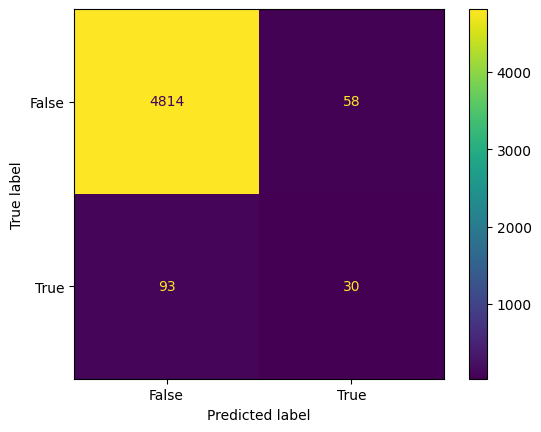

In [16]:
# Observando a matriz de confusão
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=clf.classes_
)
disp.plot()
plt.show()

### 3.3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

In [17]:
# Calculando a acurácia
print(f"Acurácia: {accuracy_score(predictions, y_test)*100:.2f}%")

Acurácia: 96.98%


### 3.4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

In [18]:
# Instanciando um novo objeto e treinando com as novas configurações da árvore
clf = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=5,
    random_state=123
)

clf = clf.fit(x_train,y_train)

clf

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

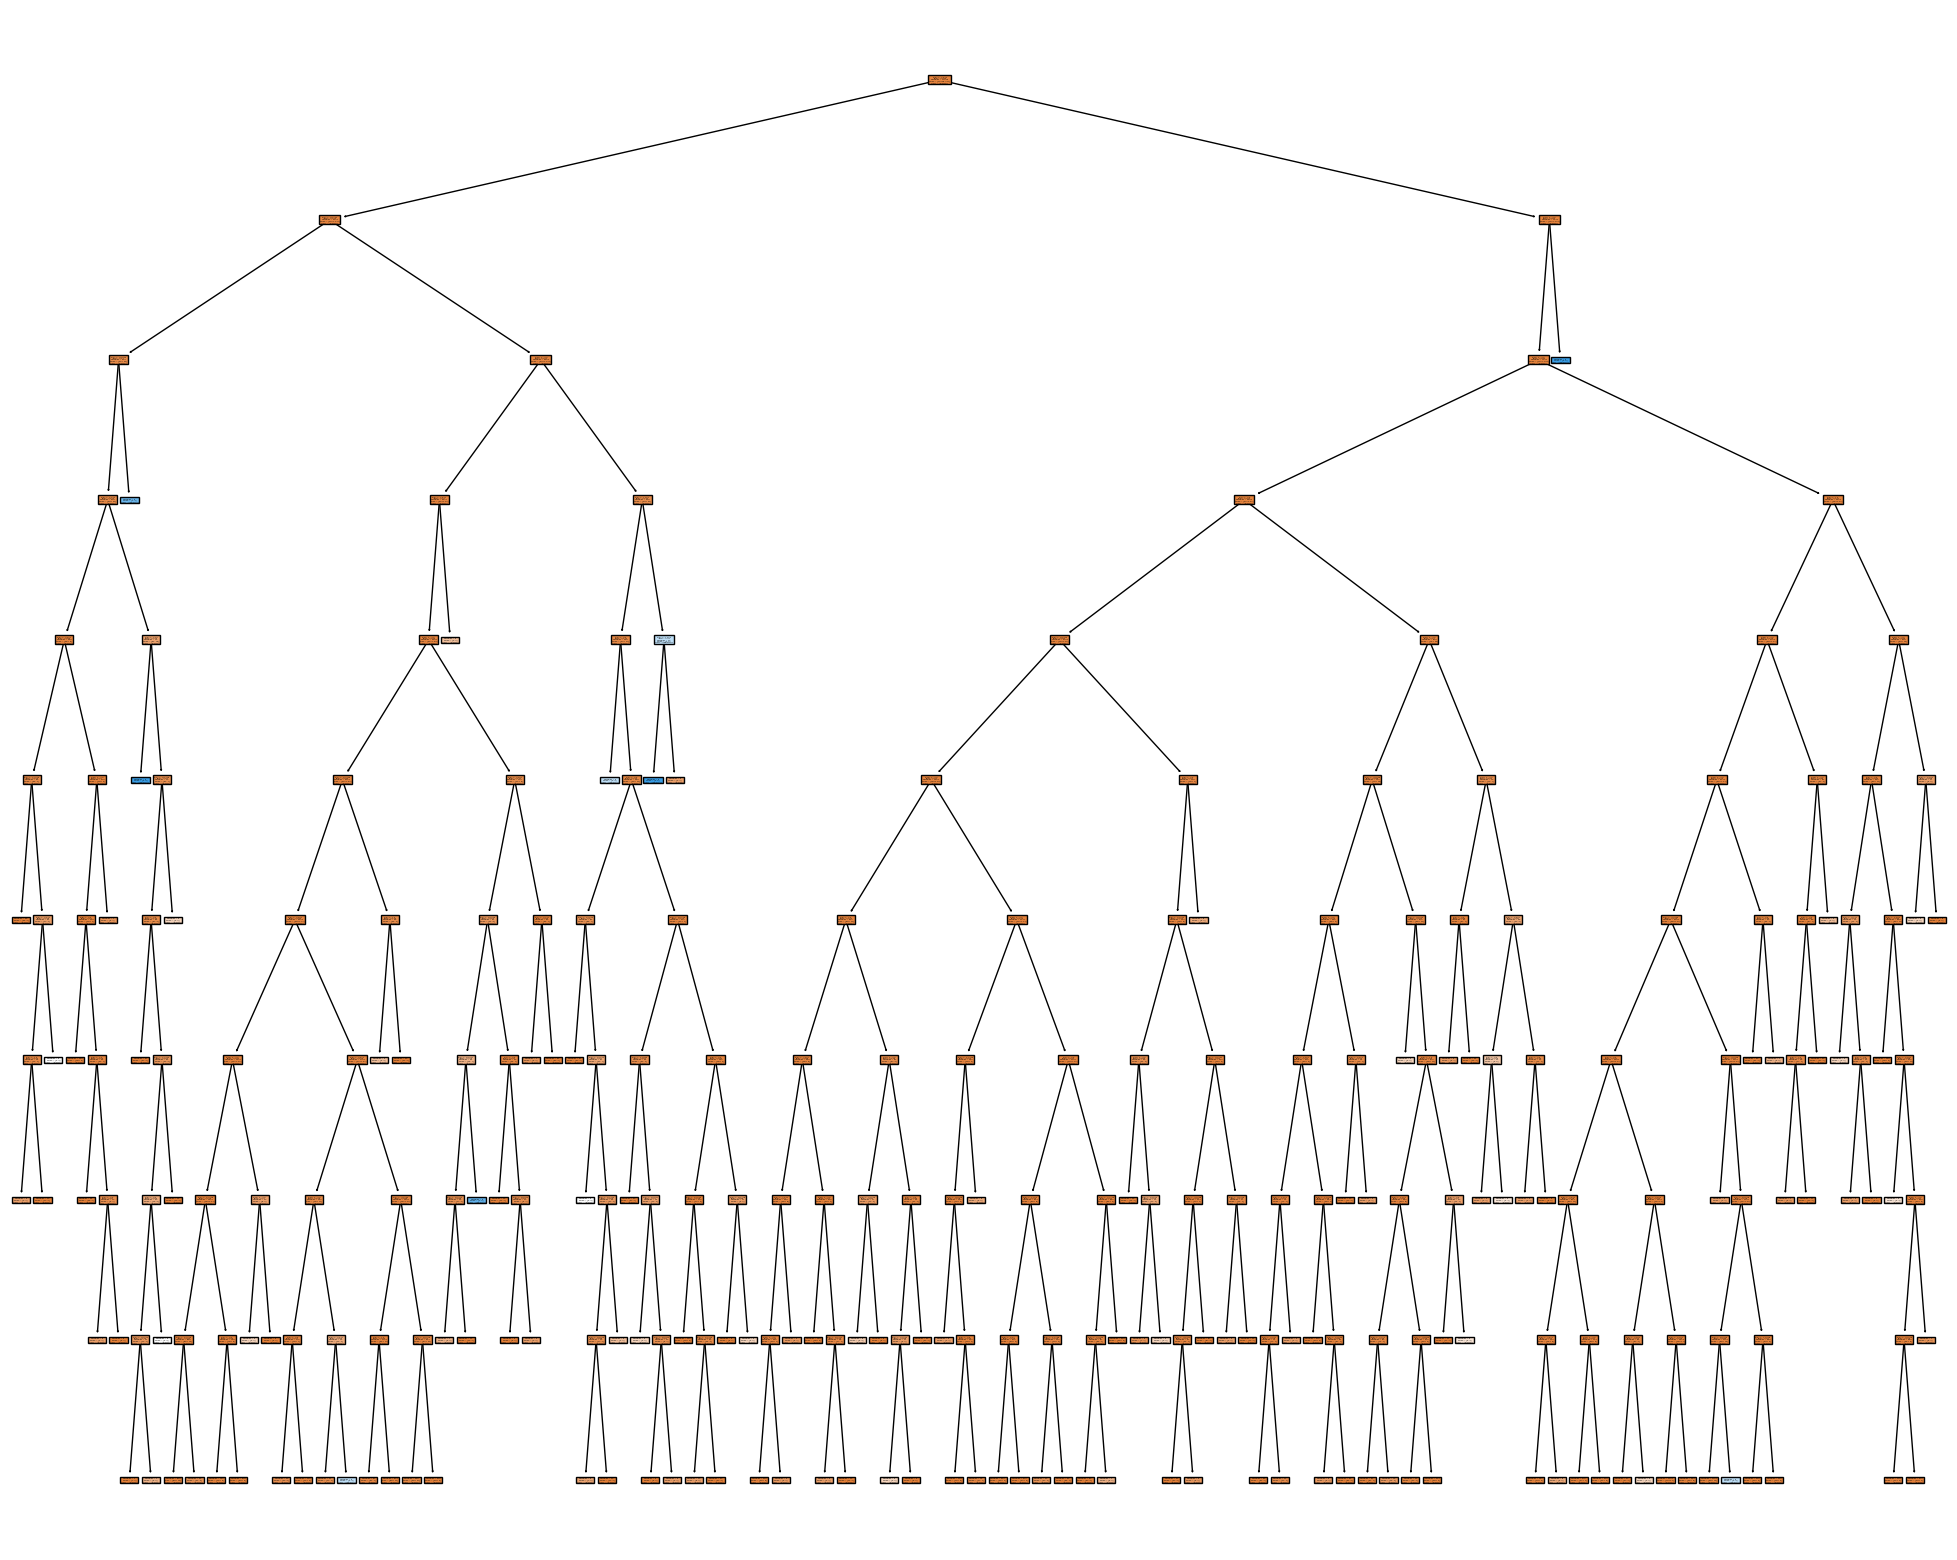

In [19]:
# Visualizando a árvore
plt.figure(figsize=(25, 20))
plot_tree(clf,
          filled=True,
          class_names=['Aprovado', 'Reprovado']
)
plt.show()

In [20]:
# Observando a matriz de confusão
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

df_cm = pd.DataFrame(cm, columns=['Pred Aprovado','Pred Reprovado'], index=['Obs Aprovado','Obs Reprovado'])
df_cm

,Pred Aprovado,Pred Reprovado
Obs Aprovado,4859,13
Obs Reprovado,121,2


In [21]:
# Analisanod a acurácia
print(f"Acurácia: {accuracy_score(predictions, y_test)*100:.2f}%")

Acurácia: 97.32%


### 3.5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [22]:
# Instanciando um numpy aray com zeros como valores para classe
predictions = np.zeros(predictions.shape[0])

# Verificando a matriz de confusão, caso todos os valores preditos forem zero
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

df_cm = pd.DataFrame(cm, columns=['Pred Aprovado','Pred Reprovado'], index=['Obs Aprovado','Obs Reprovado'])
df_cm

,Pred Aprovado,Pred Reprovado
Obs Aprovado,4872,0
Obs Reprovado,123,0


In [23]:
# Varificando acurária
print(f"Acurácia: {accuracy_score(predictions, y_test)*100:.2f}%")

Acurácia: 97.54%


Na verdade, como o número de maus pagadores é pequeno, podemos observar uma discreta diferença na acurácia, pois apenas poucos valores foram preditos erroneamente.

É sugerido o rebalanceamento dos dados.